In [6]:
pip install --upgrade pip


   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
    --------------------------------------- 0.0/1.8 MB 145.2 kB/s eta 0:00:13
    --------------------------------------- 0.0/1.8 MB 145.2 kB/s eta 0:00:13
   - -------------------------------------- 0.1/1.8 MB 204.8 kB/s eta 0:00:09
   -- ------------------------------------- 0.1/1.8 MB 261.7 kB/s eta 0:00:07
   --- ------------------------------------ 0.2/1.8 MB 456.4 kB/s eta 0:00:04
   ---- ----------------------------------- 0.2/1.8 MB 529.7 kB/s eta 0:00:04
   ----- ---------------------------------- 0.3/1.8 MB 584.5 kB/s eta 0:00:03
   ------ --------------------------------- 0.3/1.8 MB 613.6 kB/s eta 0:00:03
   ------- -------------------------------- 0.3/1.8 MB 617.8 kB/s eta 0:00:03
   ------- ----------

In [7]:
pip install tensorflow

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ------------------------- -------------- 30.7/48.7 kB ? eta -:--:--
     -------------------------------------- 48.7/48.7 kB 818.8 kB/s eta 0:00:00
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
   ---------------------------------------- 0.0/385.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/385.0 MB 991.0 kB/s eta 0:06:29
   ---------------------------------------- 0.1/385.0 MB 1.3 MB/s eta 0:04:55
   ---------------------------------------- 0.1/385.0 MB 1.1 MB/s eta 0:06:02
   -------------------------

In [9]:
import tensorflow as tf
import numpy as np
from keras import models,layers,optimizers
from keras.datasets import cifar10
from keras.utils import to_categorical

In [11]:
(xtrain,ytrain),(xtest,ytest) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 75s 0us/step


In [12]:
xtrain,xtest =xtrain/255.0, xtest/255.0

In [13]:
ytrain = to_categorical(ytrain,10)
ytest = to_categorical(ytest,10)

In [16]:

model1 = models.Sequential()

model1.add(layers.Flatten(input_shape=(32,32,3)))

model1.add(layers.Dense(256, activation='relu',kernel_initializer = 'glorot_uniform'))

model1.add(layers.Dense(128,activation='relu', kernel_initializer='glorot_uniform'))

model1.add(layers.Dense(10,activation='softmax',kernel_initializer='glorot_uniform'))


C:\Users\aswin\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
sgd_optimzer= optimizers.SGD(learning_rate=0.01, momentum=0.9)

In [18]:
model1.compile(
    optimizer = sgd_optimzer,
    loss= 'categorical_crossentropy',
    metrics= ['accuracy'])

In [20]:
xav= model1.fit(xtrain,ytrain,epochs=25,batch_size=32,validation_split=.2)

Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.2590 - loss: 2.0003 - val_accuracy: 0.3631 - val_loss: 1.7789
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.3640 - loss: 1.7635 - val_accuracy: 0.3913 - val_loss: 1.6996
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.3936 - loss: 1.6747 - val_accuracy: 0.4091 - val_loss: 1.6502
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.4111 - loss: 1.6366 - val_accuracy: 0.4039 - val_loss: 1.6603
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.4300 - loss: 1.5903 - val_accuracy: 0.4146 - val_loss: 1.6456
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.4436 - loss: 1.5617 - val_accuracy: 0.4274 - val_loss: 1.6047
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.4477 - loss: 1.5417 - val_accuracy: 0.4244 - val_loss: 1.6275
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.4512 - loss:

In [21]:
xav_score = model1.evaluate(xtest,ytest,batch_size=32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4556 - loss: 1.5629


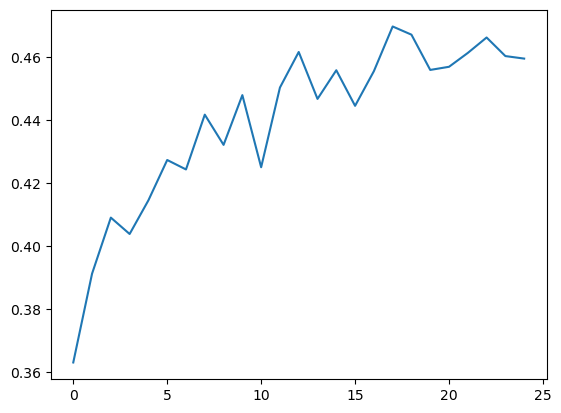

In [22]:
import matplotlib.pyplot as plt
plt.plot(xav.history['val_accuracy'],label='xavier_initialization')